<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

In [49]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, Ftrl, Nadam
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import seaborn as sns
import pandas as pd
import numpy as np

### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

In [16]:
data = np.load('../quickdraw10.npz')
data.files
    
def load_quickdraw10(path, x_loc, y_loc, outlier_val=-1):
    """
    Get loaded data and split; returns X_train/test and y train_test
    with 40% split.
    Normalize data; enter in outlier value or keep default (-1) to 
    select auto and find X max.
    
    Input: data path, X and y index label
    
    :Return: X_train, X_test, y_train, y_test
    """
    X = path[x_loc]
    y = path[y_loc]
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, 
                                                        test_size = 0.4,
                                                        random_state=445642)
    # Read or find outlier, -1 is auto, else inputed value used.
    if outlier_val == -1:
        outlier_val = X.max()
    else:
        outlier_val = outlier_val
    
    # Normalize X_test/train by outlier value
    X_train, X_test = X_train.astype('float32') / outlier_val, X_test.astype('float32') / outlier_val
    
    # Print info
    print(f'X shape = {X.shape}\n'
          f'y shape = {y.shape}\n'
          f'X (max, min) = ({X.max()}, {X.min()})\n'
          f'X (train.shape, test.shape) = [ {X_train.shape}, {X_test.shape} ]\n\n'
          f'y Unique = {len(np.unique(y))}')
    
    return X_train, y_train, X_test, y_test

In [17]:
# Load data to splitter and normalizer
X_train, y_train, X_test, y_test = load_quickdraw10(path=data,
                                                   x_loc='arr_0',
                                                   y_loc='arr_1')

X shape = (100000, 784)
y shape = (100000,)
X (max, min) = (255, 0)
X (train.shape, test.shape) = [ (60000, 784), (40000, 784) ]

y Unique = 10


In [18]:
# # flatten the 2D images into row vectors
# X_train = X_train.reshape((X_train.shape[0], 784))
# X_test = X_test.reshape((X_test.shape[0], 784))

### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

In [42]:
def create_model(learn_rate=0.1, opt='SGD'):
    """
    SGD, Adam, Adadelta, Ftrl, nadam
    """
    model = Sequential()
    
    if opt.lower() == 'sgd':
        opt = SGD(learning_rate=learn_rate)
    elif opt.lower() == 'adam':
        opt = Adam(learning_rate=learn_rate)
    elif opt.lower() == 'adadelta':
        opt = Adadelta(learning_rate=learn_rate)
    elif opt.lower() == 'ftrl':
        opt = Ftrl(learning_rate=learn_rate)
    elif opt.lower() == 'nadam':
        opt = Nadam(learning_rate=learn_rate)
    
    model = Sequential([
        # Hidden L-1
        Dense(100, activation='relu', input_dim=784),
        # Hidden L-2
        Dense(32, activation='relu'),
        # Hidden L-3
        Dense(16, activation='tanh'),
        # Output
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [43]:
model = create_model()
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_29 (Dense)             (None, 32)                3232      
_________________________________________________________________
dense_30 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_31 (Dense)             (None, 10)                170       
Total params: 82,430
Trainable params: 82,430
Non-trainable params: 0
_________________________________________________________________


### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [21]:
batch_10 = model.fit(
                    X_train, 
                    y_train, 
                    validation_data=(X_test, y_test), 
                    batch_size=10, 
                    epochs=20,
                    verbose=0 # 0=silent, 1=progressBar, 2=line-per-epoch
                    )

batch_100 = model.fit(
                    X_train, 
                    y_train, 
                    validation_data=(X_test, y_test), 
                    batch_size=100, 
                    epochs=20,
                    verbose=0 # 0=silent, 1=progressBar, 2=line-per-epoch
                    )

batch_1000 = model.fit(
                    X_train, 
                    y_train, 
                    validation_data=(X_test, y_test), 
                    batch_size=1000, 
                    epochs=20,
                    verbose=0 # 0=silent, 1=progressBar, 2=line-per-epoch
                    )

batch_10000 = model.fit(
                    X_train, 
                    y_train, 
                    validation_data=(X_test, y_test), 
                    batch_size=10000, 
                    epochs=20,
                    verbose=0 # 0=silent, 1=progressBar, 2=line-per-epoch
                    )

batch_100000 = model.fit(
                    X_train, 
                    y_train, 
                    validation_data=(X_test, y_test), 
                    batch_size=100000, 
                    epochs=20,
                    verbose=0 # 0=silent, 1=progressBar, 2=line-per-epoch
                    )

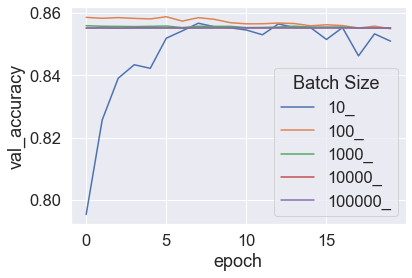

In [54]:
batch_sizes = []

for exp, result in zip([batch_10, batch_100, batch_1000, batch_10000, batch_100000], ["10_", "100_", "1000_", "10000_", "100000_"]):

    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Batch Size'] = result

    batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set(font_scale=1.5)
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df);


### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [39]:
# Best batch = 1000
model_1 = create_model(learn_rate=1)
lr1 = model_1.fit(
                    X_train, 
                    y_train, 
                    validation_data=(X_test, y_test), 
                    batch_size=1000, 
                    epochs=20,
                    verbose=0 # 0=silent, 1=progressBar, 2=line-per-epoch
                    )

model_01 = create_model(learn_rate=0.1)
lr01 = model_01.fit(
                    X_train, 
                    y_train, 
                    validation_data=(X_test, y_test), 
                    batch_size=1000, 
                    epochs=20,
                    verbose=0 # 0=silent, 1=progressBar, 2=line-per-epoch
                    )

model_001 = create_model(learn_rate=0.01)
lr001 = model_001.fit(
                    X_train, 
                    y_train, 
                    validation_data=(X_test, y_test), 
                    batch_size=1000, 
                    epochs=20,
                    verbose=0 # 0=silent, 1=progressBar, 2=line-per-epoch
                    )

model_0001 = create_model(learn_rate=0.001)
lr0001 = model_0001.fit(
                    X_train, 
                    y_train, 
                    validation_data=(X_test, y_test), 
                    batch_size=1000, 
                    epochs=20,
                    verbose=0 # 0=silent, 1=progressBar, 2=line-per-epoch
                    )

model_00001 = create_model(learn_rate=0.0001)
lr00001 = model_00001.fit(
                    X_train, 
                    y_train, 
                    validation_data=(X_test, y_test), 
                    batch_size=1000, 
                    epochs=20,
                    verbose=0 # 0=silent, 1=progressBar, 2=line-per-epoch
                    )

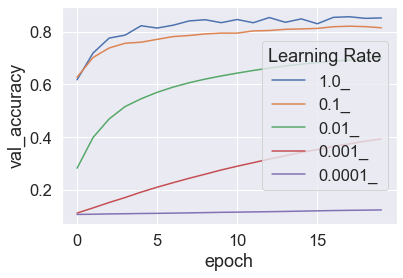

In [55]:
learning_rate = []

for exp, result in zip([lr1, lr01, lr001, lr0001, lr00001], ["1.0_", "0.1_", "0.01_", "0.001_", "0.0001_"]):

    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Learning Rate'] = result

    learning_rate.append(df)

df = pd.concat(learning_rate)
df['Learning Rate'] = df['Learning Rate'].astype('str')

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set(font_scale=1.5)
sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df);


In [ ]:
# Using 0.1 as a smooth LR for project
# Set default in model constructor as 0.1

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [50]:
# sgd, adam, adadelta, ftrl, optimizer
model_sgd = create_model(opt='sgd')
sgd = model_sgd.fit(
                    X_train, 
                    y_train, 
                    validation_data=(X_test, y_test), 
                    batch_size=1000, 
                    epochs=20,
                    verbose=0 # 0=silent, 1=progressBar, 2=line-per-epoch
                    )

model_adam = create_model(opt='adam')
adam = model_adam.fit(
                    X_train, 
                    y_train, 
                    validation_data=(X_test, y_test), 
                    batch_size=1000, 
                    epochs=20,
                    verbose=0 # 0=silent, 1=progressBar, 2=line-per-epoch
                    )

model_adadelta = create_model(opt='adadelta')
adadelta = model_adadelta.fit(
                    X_train, 
                    y_train, 
                    validation_data=(X_test, y_test), 
                    batch_size=1000, 
                    epochs=20,
                    verbose=0 # 0=silent, 1=progressBar, 2=line-per-epoch
                    )

model_ftrl = create_model(opt='ftrl')
ftrl = model_ftrl.fit(
                    X_train, 
                    y_train, 
                    validation_data=(X_test, y_test), 
                    batch_size=1000, 
                    epochs=20,
                    verbose=0 # 0=silent, 1=progressBar, 2=line-per-epoch
                    )

model_nadam = create_model(opt='nadam')
nadam = model_nadam.fit(
                    X_train, 
                    y_train, 
                    validation_data=(X_test, y_test), 
                    batch_size=1000, 
                    epochs=20,
                    verbose=0 # 0=silent, 1=progressBar, 2=line-per-epoch
                    )


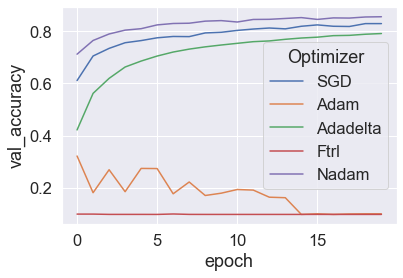

In [57]:
learning_rate = []

for exp, result in zip([sgd, adam, adadelta, ftrl, nadam], ['SGD', 'Adam', 'Adadelta', 'Ftrl', 'Nadam']):

    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Optimizer'] = result

    learning_rate.append(df)

df = pd.concat(learning_rate)
df['Optimizer'] = df['Optimizer'].astype('str')

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set(font_scale=1.5)
sns.lineplot(x='epoch', y='val_accuracy', hue='Optimizer', data=df);

### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 
```
In the case of a classification problem; feeding known data "backwards" to train the layers. Backpropagation benefits from large amounts of data.
```



## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


